In [284]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [285]:
df = pd.read_csv("Train_Data.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [286]:
df.shape

(86845, 43)

In [287]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.

In [288]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [289]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [290]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,netbios_dgm,REJ,neptune
1,tcp,smtp,SF,normal
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,uucp_path,REJ,neptune
...,...,...,...,...
86840,tcp,http,SF,normal
86841,tcp,http,SF,normal
86842,tcp,ftp,SF,normal
86843,tcp,smtp,SF,normal


Setting normal=0 and neptune=1

In [291]:
df['attack'].loc[df['attack']!='normal']=1
df['attack'].loc[df['attack']=='normal']=0
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,1,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,1,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [292]:
le=LabelEncoder()

In [293]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

Heat Map

<Axes: >

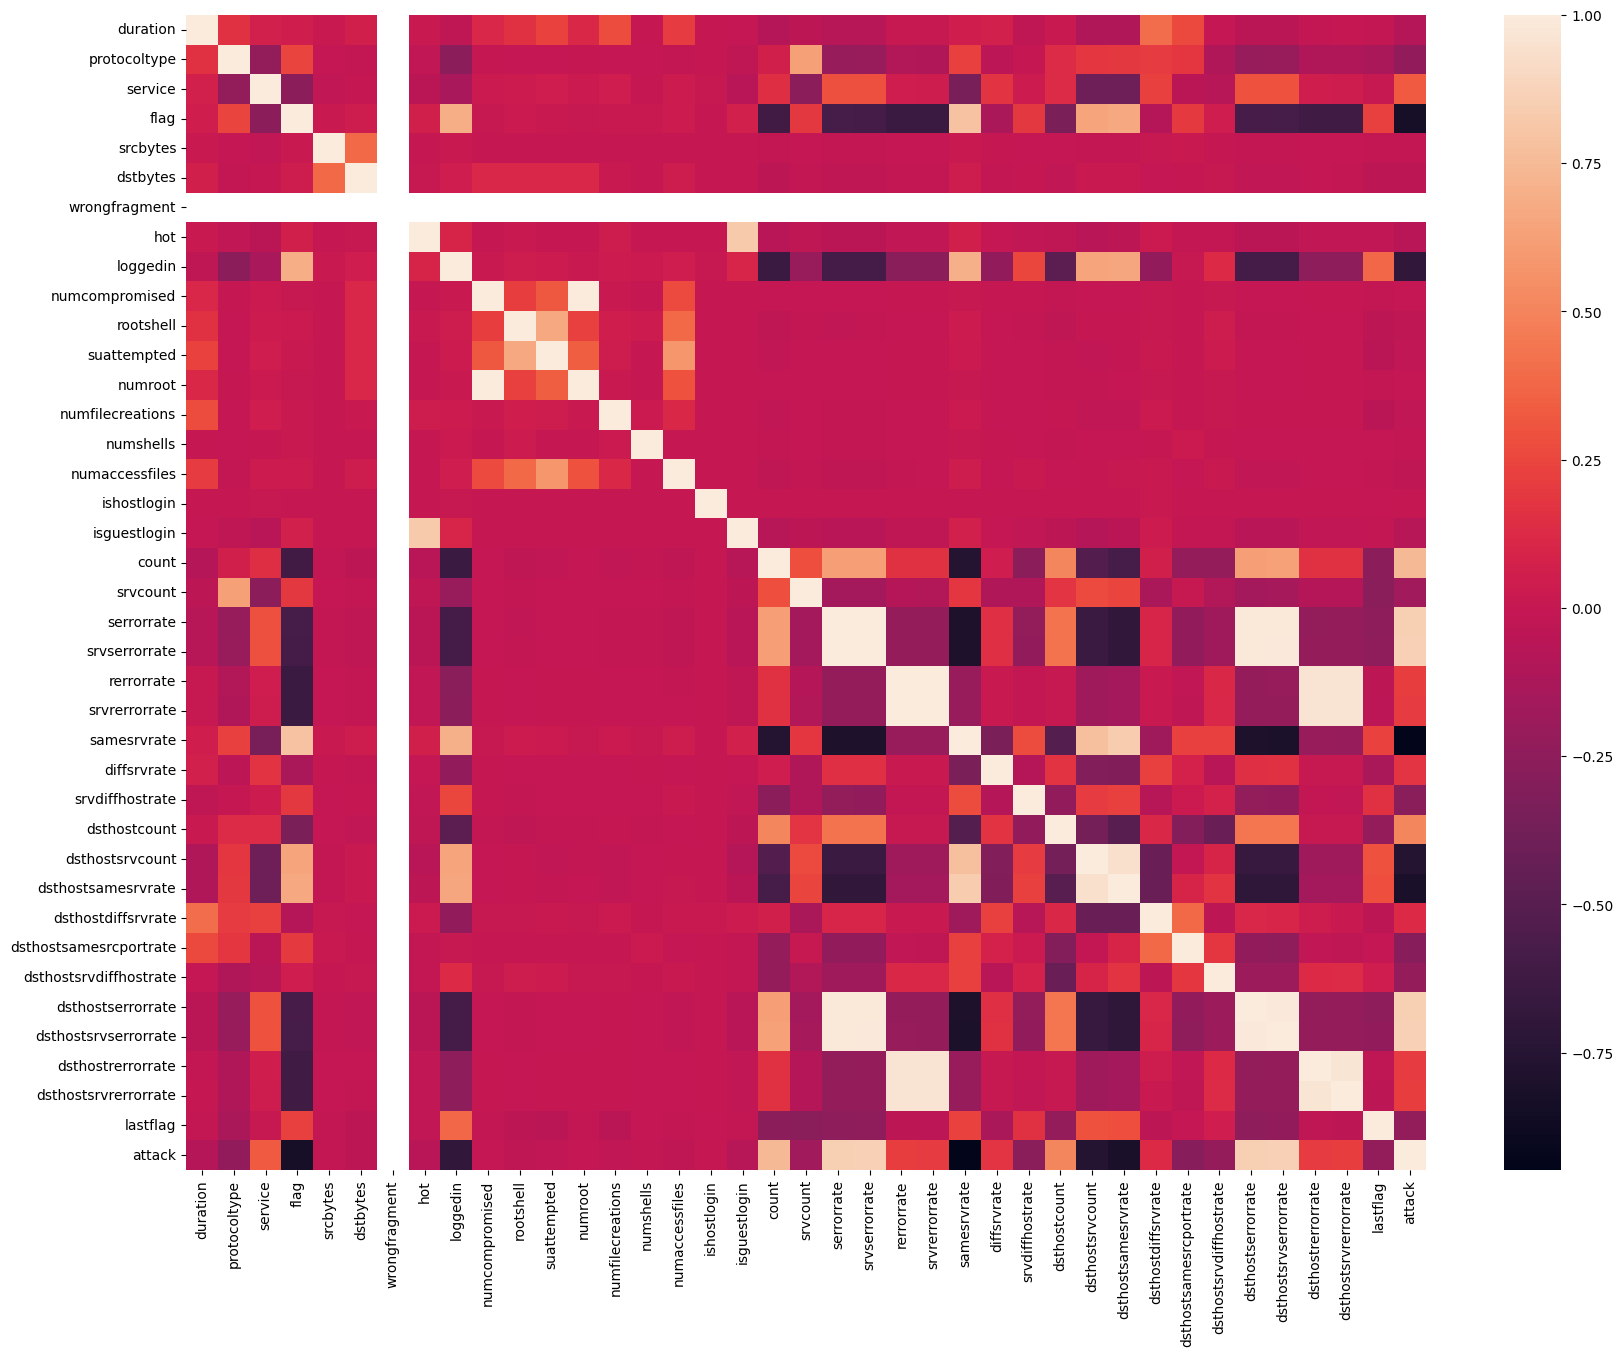

In [294]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

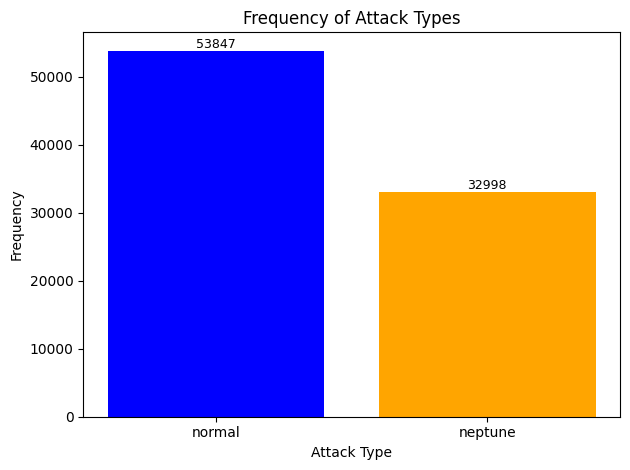

In [295]:
# Count the occurrences of each category
counts = df['attack'].value_counts()

# Create a bar plot
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])

# Set labels and title
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Attack Types')

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1], labels=['normal', 'neptune'])

# Add frequency counts on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=9, color='black')

# Show plot
plt.tight_layout()
plt.show()

## Model Development

Random Forest Classifier

In [296]:
from sklearn.model_selection import train_test_split

# Assuming 'attack' is your target variable and other columns are features
X = df.drop(['attack'], axis=1)
y = df['attack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [297]:
# Initialize Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [298]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10762
           1       1.00      1.00      1.00      6607

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369



### Training Random forest on whole Train_Data.csv

In [299]:
import joblib  # For saving the trained model

X_train = df.drop(['attack'], axis=1)
y_train = df['attack']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the entire training data
rf.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


### Obtaining Outpur for Test_Data

In [300]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  # If scaling was used in training

# Load Test_Data.csv (assuming it doesn't have the target column)
df = pd.read_csv('Test_Data.csv')

In [301]:
df.shape

(21712, 42)

In [302]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [303]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])

In [304]:
# Predict using the loaded model
y_pred = rf.predict(df)

# Create DataFrame for predictions
output_df = pd.DataFrame({'attack': y_pred})

# Save predictions to 'output.csv' file
output_df.to_csv('output.csv', index=False)

print("Predictions saved to output.csv")

Predictions saved to output.csv
